# IDS

In [3]:
import os
import pandas as pd

os.chdir("/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker")

tcr_common=[]
df_common=pd.read_csv("./seqs_info/tcr_common_allinfo.csv")
for tcr_id in df_common['TCR_name']:
    tcr_common.append(tcr_id)

tcr_test_random=[]
df_test=pd.read_csv("./seqs_info/seqs_test_random.csv")
for tcr_id in df_test['TCR_name']:
    tcr_test_random.append(tcr_id)

tcr_test_group=[]
df_test2=pd.read_csv("./seqs_info/seqs_test_groups.csv")
for tcr_id in df_test2['TCR_name']:
    tcr_test_group.append(tcr_id)

In [4]:
nr_seq=pd.read_csv("../vdjdb/nonred_sequences.csv")
sequences = pd.read_csv('../vdjdb/vdjdb_filtered.csv')
nr_seq_ids=[]
for tcr_id in nr_seq['tcr_id']:
    nr_seq_ids.append(tcr_id)

training_set=[]
for file in os.listdir("./input/input_training"):
    pdb_id= file.split("_")[0]
    training_set.append(pdb_id)
filtered_df = sequences[sequences['TCR_name'].isin(nr_seq_ids)]
print(len(filtered_df))

23256


In [5]:
seqs_info=pd.read_csv("./seqs_info/seqs_info.csv")

# ATM-TCR

### Input files

In [156]:
import pandas as pd

seqs_random = pd.read_csv("./seqs_info/seqs_info.csv")

for index, row in seqs_random.iterrows():
    tcr_id = row['TCR_name']
    epitope = row['Epitope']
    cdr3b = row['TRB_CDR3']
    binding_affinity = 1

    # Create row_df for the first line
    row_df = pd.DataFrame({'Epitope': [epitope], 'TRB_CDR3': [cdr3b], 'binding affinity': [binding_affinity]})

    # Load additional information
    df_info = pd.read_csv("./seqs_info/tcr_common_allinfo.csv", sep=',')
    new_df = df_info[["TRB_CDR3"]].copy()
    new_df['binding affinity'] = 1
    new_df.insert(0, 'Epitope', epitope)

    # Concatenate row_df and new_df
    new_df = pd.concat([row_df, new_df], ignore_index=True)

    # Save the concatenated DataFrame to CSV
    new_df.to_csv(f"./input/ATM-TCR/atm_random/atm_{tcr_id}_{epitope}.csv", index=False, header=False)

,TCR_name,TRA_aa,TRB_aa,TRA_CDR3,TRB_CDR3,TRAV,TRAJ,TRBV,TRBJ,TRAC,TRBC,MHC_allele,TRAC_seq,TRBC_seq,TRAV_seq,TRBV_seq,Epitope,B2M_seq,MHC_seq
0,5,MASAPISMLAMLFTLSGLRAQSVAQPEDQVNVAEGNPLTVKCTYSV...,MGSRLLCWVLLCLLGAGPVKAGVTQTPRYLIKTRGQQVTLSCSPIS...,CAVRDGGTGFQKLVF,CASRQDRDYQETQYF,TRAV3*01,TRAJ8*01,TRBV5-1*01,TRBJ2-5*01,TRAC*01,TRBC2*01,HLA-B*35:08,IQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDK...,DLKNVFPPEVAVFEPSEAEISHTQKATLVCLATGFYPDHVELSWWV...,MASAPISMLAMLFTLSGLRAQSVAQPEDQVNVAEGNPLTVKCTYSV...,MGSRLLCWVLLCLLGAGPVKAGVTQTPRYLIKTRGQQVTLSCSPIS...,HPVGEADYFEY,MSRSVALAVLALLSLSGLEAIQRTPKIQVYSRHPAENGKSNFLNCY...,MRVTAPRTVLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRF...
1,53,MKTFAGFSFLFLWLQLDCMSRGEDVEQSLFLSVREGDSSVINCTYT...,MLLLLLLLGPGISLLLPGSLAGSGLGAVVSQHPSWVICKSGTSVKI...,CAEDNNARLMF,CSARVGVGNTIYF,TRAV5*01,TRAJ31*01,TRBV20-1*01,TRBJ1-3*01,TRAC*01,TRBC1*01,HLA-A*02:01,IQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDK...,DLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWV...,MKTFAGFSFLFLWLQLDCMSRGEDVEQSLFLSVREGDSSVINCTYT...,MLLLLLLLGPGISLLLPGSLAGSGLGAVVSQHPSWVICKSGTSVKI...,GLCTLVAML,MSRSVALAVLALLSLSGLEAIQRTPKIQVYSRHPAENGKSNFLNCY...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...
2,65,MKTFAGFSFLFLWLQLDCMSRGEDVEQSLFLSVREGDSSVINCTYT...,MLLLLLLLGPGISLLLPGSLAGSGLGAVVSQHPSWVICKSGTSVKI...,CAEVSGTYKYIF,CSAWDREVVGTEAFF,TRAV5*01,TRAJ40*01,TRBV20-1*01,TRBJ1-1*01,TRAC*01,TRBC1*01,HLA-A*02:01,IQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDK...,DLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWV...,MKTFAGFSFLFLWLQLDCMSRGEDVEQSLFLSVREGDSSVINCTYT...,MLLLLLLLGPGISLLLPGSLAGSGLGAVVSQHPSWVICKSGTSVKI...,GLCTLVAML,MSRSVALAVLALLSLSGLEAIQRTPKIQVYSRHPAENGKSNFLNCY...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...
3,71,MLLEHLLIILWMQLTWVSGQQLNQSPQSMFIQEGEDVSMNCTSSSI...,MLSLLLLLLGLGSVFSAVISQKPSRDICQRGTSLTIQCQVDSQVTM...,CAGQSNAGGTSYGKLTF,CSVEDGYEQYF,TRAV35*01,TRAJ52*01,TRBV29-1*01,TRBJ2-7*01,TRAC*01,TRBC2*01,HLA-A*02:01,IQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDK...,DLKNVFPPEVAVFEPSEAEISHTQKATLVCLATGFYPDHVELSWWV...,MLLEHLLIILWMQLTWVSGQQLNQSPQSMFIQEGEDVSMNCTSSSI...,MLSLLLLLLGLGSVFSAVISQKPSRDICQRGTSLTIQCQVDSQVTM...,CVNGSCFTV,MSRSVALAVLALLSLSGLEAIQRTPKIQVYSRHPAENGKSNFLNCY...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...
4,72,MWGVFLLYVSMKMGGTTGQNIDQPTEMTATEGAIVQINCTYQTSGF...,MSNQVLCCVVLCFLGANTVDGGITQSPKYLFRKEGQNVTLSCEQNL...,CAPMDSNYQLIW,CASSNSEGSGANVLTF,TRAV1-2*01,TRAJ33*01,TRBV19*01,TRBJ2-6*01,TRAC*01,TRBC2*01,HLA-A*02:01,IQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDK...,DLKNVFPPEVAVFEPSEAEISHTQKATLVCLATGFYPDHVELSWWV...,MWGVFLLYVSMKMGGTTGQNIDQPTEMTATEGAIVQINCTYQTSGF...,MSNQVLCCVVLCFLGANTVDGGITQSPKYLFRKEGQNVTLSCEQNL...,CVNGSCFTV,MSRSVALAVLALLSLSGLEAIQRTPKIQVYSRHPAENGKSNFLNCY...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...


### Retrain

In [9]:
import pandas as pd
data_atm=pd.read_csv("../../ATM-TCR/data/combined_dataset.csv", header=None, names=['epitope', 'cdr3b', 'binding'])
seqs_info=pd.read_csv("../seqs_info/seqs_info.csv")
filtered_pairs = seqs_info[['Epitope', 'TRB_CDR3']]
filtered_pairs.columns = ['epitope', 'cdr3b']
data_atm_filtered = data_atm[~data_atm.set_index(['epitope', 'cdr3b']).index.isin(filtered_pairs.set_index(['epitope', 'cdr3b']).index)]
data_atm_filtered_2 = data_atm[data_atm.set_index(['epitope', 'cdr3b']).index.isin(filtered_pairs.set_index(['epitope', 'cdr3b']).index)]

print(len(data_atm))
print(len(data_atm_filtered))


256284
256108


### Run command

In [ ]:
import os
import subprocess
os.chdir("/users/alexascunceparis/Desktop/BSC/immuno_project/ATM-TCR")

input_directory = '../TCRranker/input/ATM-TCR/atm_random/' 
infile = './data/dataset_retrained.csv' 
model_name = 'model_alex.ckpt' 

for filename in os.listdir(input_directory):
    if filename.endswith('.csv'):
        indepfile = os.path.join(input_directory, filename)  
        
        command = f'python main.py --infile {infile} --indepfile {indepfile} --model_name {model_name} --mode test --cuda False'
        
        print(f'Ejecutando: {command}')
        subprocess.run(command, shell=True)
          
print("Finished")

### Cognate TCR rank

In [98]:
import os
import pandas as pd

# Path to the folder containing the files
input_dir = f"/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/ATM-TCR/atm_random/"
seqs_info = pd.read_csv("/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/seqs_info/seqs_info.csv")

# List to store results
results = []

# Loop through the files in the directory
for file in os.listdir(input_dir):
    if file.startswith("scores_") and file.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, sep='\t', header=None)
        
        # Extract tcr_id and epitope from the file name
        parts = file.split("_")
        tcr_id = parts[1]
        epitope = parts[2].split(".")[0]  # Get the epitope by removing the extension
        
        # Search TRB_CDR3 in seqs_info corresponding to tcr_id
        try:
            cdr3b = seqs_info.loc[seqs_info['TCR_name'] == int(tcr_id), 'TRB_CDR3'].values[0]
        except IndexError:
            print(f"No CDR3 found for TCR ID {tcr_id}. Skipping this file.")
            continue  # Skip this file if no CDR3 is found
        
        # Reference row those with the same TRB_CDR3 in the second column
        reference_row = df[df.iloc[:, 1] == cdr3b]
        
        if reference_row.empty:
            print(f"No reference row found for CDR3 {cdr3b} in file {file}. Skipping.")
            continue  # Skip this file if no reference row is found

        # Reference score is the last column (column 4)
        reference_score = reference_row.iloc[0, -1]  # Use the first matching row's score

        # Calculate the percentage of scores greater than the reference score
        count_greater = (df.iloc[:, -1] > reference_score).sum()  # Count scores greater than the reference score
        total_count = len(df)
        percentage_greater = (count_greater / total_count) * 100 if total_count > 0 else 0
        
        # Store the results
        results.append({
            'tcr_id': tcr_id,
            'epitope': epitope,
            'reference_score': reference_score,
            'percentage_greater': percentage_greater
        })

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Save the results in a CSV
results_df.to_csv(os.path.join(input_dir, f'cognate_TCR_rank.csv'), index=False)

# Print the results
print(results_df)

    tcr_id     epitope  reference_score  percentage_greater
0     7638   GLCTLVAML         0.590620           26.466381
1     5152    RAKFKQLL         0.999999            5.722461
2    25972   SPRWYFYYL         0.860071           71.244635
3    14380   KLGGALQAK         0.552274           85.550787
4     5605   KLGGALQAK         0.955416           61.659514
..     ...         ...              ...                 ...
145   7796   KLGGALQAK         0.989384           46.208870
146    404   CINGVCWTV         0.834960           32.761087
147   3368  LLDFVRFMGV         0.997733           28.040057
148  17611   KLGGALQAK         0.997942           29.470672
149   1385  ELAGIGILTV         0.307114           34.763948

[150 rows x 4 columns]


# IMW

### Input files

In [ ]:
import pandas as pd

seqs_random = pd.read_csv("./seqs_info/seqs_test_groups.csv")

for index, row in seqs_random.iterrows():
    tcr_id = row['TCR_name']
    epitope=row['Epitope']
    trav=row['TRAV']
    traj=row['TRAJ']
    trbv=row['TRBV']
    trbj=row['TRBJ']
    cdr3a=row['TRA_CDR3']
    cdr3b=row['TRB_CDR3']

    row_df_a = pd.DataFrame({'clone_id': [tcr_id], 'junction_aa': [cdr3a], 'v_call': [trav], 'j_call': [traj]})
    row_df_b = pd.DataFrame({'clone_id': [tcr_id], 'junction_aa': [cdr3b], 'v_call': [trbv], 'j_call': [trbj]})
    # Concat both rows
    rows = pd.concat([row_df_a, row_df_b])

    df_info = pd.read_csv("./seqs_info/tcr_common_allinfo.csv", sep=',')
    new_df_a = df_info[["TCR_name","TRA_CDR3", "TRAV", "TRAJ"]].copy()
    new_df_b = df_info[["TCR_name","TRB_CDR3", "TRBV", "TRBJ"]].copy()
    new_df_a = new_df_a.rename(columns={'TCR_name': 'clone_id', 'TRA_CDR3': 'junction_aa', 'TRAV': 'v_call', 'TRAJ': 'j_call'})
    new_df_b = new_df_b.rename(columns={'TCR_name': 'clone_id', 'TRB_CDR3': 'junction_aa', 'TRBV': 'v_call', 'TRBJ': 'j_call'})
    #Concat dfs
    new_df = pd.concat([new_df_a, new_df_b])
    #Sort by TCR_name
    new_df = new_df.sort_values(by='clone_id')
    #Add 2 rows as the two first lines of the df
    new_df = pd.concat([rows, new_df])
    new_df.to_csv(f"./input/IMW/imw_{tcr_id}_{epitope}.csv", header=True, index=False)

### Retrain model df

In [6]:
import pandas as pd
vdjdb_github=pd.read_csv("../vdjdb_github/vdjdb.txt", sep='\t')
vdjdb_github.head()
print(len(vdjdb_github))

92771


In [7]:
tcr_toexclude=tcr_test_group + tcr_common + tcr_test_random
len(set(tcr_toexclude))

996

In [8]:
vdj_mine=pd.read_csv("../vdjdb/vdjdb_raw.tsv", sep='\t')
vdj_mine.head()

,complex.id,Gene,CDR3,V,J,Species,MHC A,MHC B,MHC class,Epitope,Epitope gene,Epitope species,Reference,Method,Meta,CDR3fix,Score
0,1,TRB,CASSARSGELFF,TRBV9*01,TRBJ2-2*01,HomoSapiens,HLA-B*35:01,B2M,MHCI,HPVGEADYFEY,EBNA1,EBV,PMID:17082594,"{""frequency"": """", ""identification"": ""antigen-l...","{""cell.subset"": """", ""clone.id"": ""TK3"", ""donor....","{""cdr3"": ""CASSARSGELFF"", ""cdr3_old"": ""CASSARSG...",1
1,2,TRB,CASSARSGELFF,TRBV9*01,TRBJ2-2*01,HomoSapiens,HLA-B*35:01,B2M,MHCI,HPVGEADYFEY,EBNA1,EBV,PMID:17082594,"{""frequency"": """", ""identification"": ""antigen-l...","{""cell.subset"": """", ""clone.id"": ""TK6"", ""donor....","{""cdr3"": ""CASSARSGELFF"", ""cdr3_old"": ""CASSARSG...",1
2,3,TRB,CASSAPTGELFF,TRBV9*01,TRBJ2-2*01,HomoSapiens,HLA-B*35:01,B2M,MHCI,HPVGEADYFEY,EBNA1,EBV,PMID:17082594,"{""frequency"": """", ""identification"": ""antigen-l...","{""cell.subset"": """", ""clone.id"": ""CS1"", ""donor....","{""cdr3"": ""CASSAPTGELFF"", ""cdr3_old"": ""CASSAPTG...",1
3,4,TRB,CASSARTGELFF,TRBV9*01,TRBJ2-2*01,HomoSapiens,HLA-B*35:01,B2M,MHCI,HPVGEADYFEY,EBNA1,EBV,PMID:17082594,"{""frequency"": """", ""identification"": ""antigen-l...","{""cell.subset"": """", ""clone.id"": ""MW1"", ""donor....","{""cdr3"": ""CASSARTGELFF"", ""cdr3_old"": ""CASSARTG...",1
4,5,TRA,CAVRDGGTGFQKLVF,TRAV3*01,TRAJ8*01,HomoSapiens,HLA-B*35:08,B2M,MHCI,HPVGEADYFEY,EBNA1,EBV,PMID:17082594,"{""frequency"": """", ""identification"": ""antigen-l...","{""cell.subset"": """", ""clone.id"": ""SB14"", ""donor...","{""cdr3"": ""CAVRDGGTGFQKLVF"", ""cdr3_old"": ""CAVRD...",1


In [18]:
print(len(vdj_mine))
filtered_vdj_mine = vdj_mine[vdj_mine['complex.id'].isin(tcr_toexclude)]
print(len(filtered_vdj_mine))
filtered_vdj_mine.columns

62132
1992


Index(['complex.id', 'Gene', 'CDR3', 'V', 'J', 'Species', 'MHC A', 'MHC B',
       'MHC class', 'Epitope', 'Epitope gene', 'Epitope species', 'Reference',
       'Method', 'Meta', 'CDR3fix', 'Score'],
      dtype='object')

In [52]:
import pandas as pd

# Cargar el archivo vdj_retrain
vdj_retrain = pd.read_csv("../vdjdb_github/vdj_retrain.txt", sep='\t')
print(f"Initial number of rows in vdj_retrain: {len(vdj_retrain)}")

# Renombrar columnas en filtered_vdj_mine
filtered_vdj_mine.rename(columns={
    'Gene': 'gene',
    'CDR3': 'cdr3',
    'V': 'v.segm',
    'J': 'j.segm',
    'Species': 'species',
    'MHC A': 'mhc.a',
    'MHC B': 'mhc.b',
    'MHC class': 'mhc.class',
    'Epitope': 'antigen.epitope',
    'Epitope gene': 'antigen.gene',
    'Epitope species': 'antigen.species',
    'Reference': 'reference.id',
    'Method': 'method',
    'Meta': 'meta',
    'CDR3fix': 'cdr3fix',
    'Score': 'vdjdb.score'
}, inplace=True)

# Filtrar vdj_retrain para eliminar filas que coincidan con filtered_vdj_mine
vdj_retrain_filtered = vdj_retrain[~vdj_retrain[['cdr3', 'v.segm', 'j.segm']].apply(tuple, axis=1)
                                     .isin(filtered_vdj_mine[['cdr3', 'v.segm', 'j.segm']].apply(tuple, axis=1))]

# Guardar el resultado en un archivo vdj_retrain_filtered.txt
vdj_retrain_filtered.to_csv("../vdjdb_github/vdj_retrain_filtered2.txt", sep='\t', index=False)

# Imprimir el número de filas restantes
print(f"Number of rows in filtered vdj_retrain: {len(vdj_retrain_filtered)}")
print("Archivo guardado como vdj_retrain_filtered.txt")


Initial number of rows in vdj_retrain: 90454
Number of rows in filtered vdj_retrain: 89264
Archivo guardado como vdj_retrain_filtered.txt


### Run command

In [ ]:
import os
import subprocess
os.chdir("/users/alexascunceparis/Desktop/BSC/immuno_project/")

input_dir = "./TCRranker/input/IMW/groups"
output_dir = "./TCRranker/output/IMW/groups"

for file in os.listdir(input_dir):
    if file.endswith(".csv"):  
        tcr_id = file.split("_")[1]
        epitope = file.split("_")[-1].split(".")[0]
        
        command = [
            './imw_detect', 
            '-i', f'{input_dir}/{file}',
            '-o', f'{output_dir}/scores_{tcr_id}_{epitope}.csv',
            '-d', './vdjdb_github/vdj_retrain_filtered.txt',
            '-l', '570afd80-b136-4308-ab26-0023fa46f431',
            '--epitope', epitope
        ]

        # Ejecutar el comando
        try:
            subprocess.run(command, check=True)  # 'check=True' lanzará un error si el comando falla
            print(f'Processed {file} successfully.')
        except subprocess.CalledProcessError as e:
            print(f'Error processing {file}: {e}')

In [ ]:
import os
import subprocess
os.chdir("/users/alexascunceparis/Desktop/BSC/immuno_project/")

input_dir = "./TCRranker/input/IMW/random"
output_dir = "./TCRranker/output/IMW/IMW_random"

for file in os.listdir(input_dir):
    if file.endswith(".csv"):  
        tcr_id = file.split("_")[1]
        epitope = file.split("_")[-1].split(".")[0]
        
        command = [
            './imw_detect', 
            '-i', f'{input_dir}/{file}',
            '-o', f'{output_dir}/scores_{tcr_id}_{epitope}.csv',
            '-d', './vdjdb_github/vdj_retrain_filtered.txt',
            '-l', '570afd80-b136-4308-ab26-0023fa46f431',
            '--epitope', epitope
        ]

        # Ejecutar el comando
        try:
            subprocess.run(command, check=True)  # 'check=True' lanzará un error si el comando falla
            print(f'Processed {file} successfully.')
        except subprocess.CalledProcessError as e:
            print(f'Error processing {file}: {e}')

### Cognate TCR rank

In [100]:
import os
import pandas as pd

# Path to the folder containing the files
input_dir = "/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/IMW/IMW_groups/"

# List to store results
results = []

# Loop through the files in the directory
for file in os.listdir(input_dir):
    if file.startswith("scores_") and file.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, sep='\t')
        
        # Extract tcr_id and epitope from the file name
        parts = file.split("_")
        tcr_id = parts[1]
        epitope = parts[2].split(".")[0]  # Get the epitope by removing the extension
        
        # Group by clone_id and check scores
        grouped = df.groupby('clone_id')[f'Score ({epitope})']
        
        # Determine score for each clone_id
        def determine_score(group):
            # If all values are the same, return that value
            if group.nunique() == 1:
                return group.iloc[0]
            else:
                # If not all the same, return the maximum score
                return group.max()

        collapsed_df = grouped.apply(determine_score).reset_index()
        
        # Get the reference score from the reference clone_id (which is specified in the filename)
        reference_clone_id = int(tcr_id)  
        reference_score = collapsed_df.loc[collapsed_df['clone_id'] == reference_clone_id, f'Score ({epitope})']
        
        # If the reference clone_id is not found, set reference_score to None
        if reference_score.empty:
            reference_score_value = None
        else:
            reference_score_value = reference_score.iloc[0]
        
        # Calculate the percentage of scores greater than the reference score
        if reference_score_value is not None:
            count_greater = (collapsed_df[f'Score ({epitope})'] > reference_score_value).sum()
            total_count = len(collapsed_df)
            percentage_greater = (count_greater / total_count) * 100 if total_count > 0 else 0
        else:
            percentage_greater = 0  # No reference score found
        
        # Store the results
        results.append({
            'tcr_id': tcr_id,
            'epitope': epitope,
            'reference_score': reference_score_value,
            'percentage_greater': percentage_greater
        })

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Save the results in a CSV
results_df.to_csv(os.path.join(input_dir, 'cognate_TCR_rank.csv'), index=False)

# Print the results
print(results_df)

    tcr_id      epitope  reference_score  percentage_greater
0     1016    IVTDFSVIK        -0.050131           20.457797
1    22626  HPNGYKSLSTL        -0.026840            2.861230
2    32139    KLDGFMGRI        -0.057904           23.605150
3    21410   KLFEFLVYGV        -0.107118           76.251788
4    30576    AEVQIDRLI        -0.016402            0.858369
..     ...          ...              ...                 ...
145  21404    ALSPVIPHI        -0.079705           50.500715
146  33243    AVGVGKSAL        -0.123867           88.125894
147  30610    VYIGDPAQL        -0.072604           42.489270
148  32448    TLMNVITLV        -0.151290           96.280401
149  32210    QPGQTFSVL        -0.025845            2.718169

[150 rows x 4 columns]


# TEINET

### Retrain

In [29]:
data_teinet=pd.read_csv("../TEInet/data/train_pos.csv", header=None, names=['Label', 'CDR3.beta', 'Epitope'])
filtered_pairs = seqs_info[['TRB_CDR3','Epitope']]
filtered_pairs.columns = ['CDR3.beta', 'Epitope']
data_teinet_filtered = data_teinet[~data_teinet.set_index(['CDR3.beta', 'Epitope']).index.isin(filtered_pairs.set_index(['CDR3.beta', 'Epitope']).index)]
data_teinet_filtered.to_csv('../TEInet/data/dataset_retrained.csv', index=False, header=False)
print(len(data_teinet_filtered))
print(len(data_teinet))
print(len(filtered_pairs))

1988
2001
996


### Input df

In [12]:
import pandas as pd

seqs_random = pd.read_csv("./seqs_info/seqs_test_groups.csv")

for index, row in seqs_random.iterrows():
    tcr_id = row['TCR_name']
    epitope=row['Epitope']
    cdr3b=row['TRB_CDR3']
    binding_affinity=0
    row_df = pd.DataFrame({'CDR3.beta': [cdr3b], 'Epitope': [epitope], 'Label': [binding_affinity]})
    
    df_info = pd.read_csv("./seqs_info/tcr_common_allinfo.csv", sep=',')
    new_df = df_info[["TRB_CDR3"]].copy()
    new_df['Epitope']= epitope
    new_df['binding affinity'] = 1
    new_df = new_df.rename(columns={'TRB_CDR3': 'CDR3.beta', 'Epitope': 'Epitope', 'binding affinity': 'Label'})
    new_df = pd.concat([row_df, new_df], ignore_index=True)
    new_df.to_csv(f"./input/TEINET/tei_groups/tei_{tcr_id}_{epitope}.csv", header=True, index=False)

### Run command

In [ ]:
import os
os.chdir("/users/alexascunceparis/Desktop/BSC/immuno_project/TEINet")

# Directorios de entrada y salida
input_dir = "../TCRranker/input/TEINET/tei_groups"
output_dir = "../TCRranker/output"

# Iterar sobre cada archivo en el directorio de entrada
for file in os.listdir(input_dir):
    if file.endswith(".csv"):  
        # Extraer el tcr_id y el epítopo (epitope) del nombre del archivo
        tcr_id = file.split("_")[1]
        epitope = file.split("_")[-1].split(".")[0]
        
        # Construir el comando que deseas ejecutar
        input_file_path = os.path.join(input_dir, file)
        output_file_path = os.path.join(output_dir, f"scores_{tcr_id}_{epitope}.csv")
        
        command = f"python3 predict.py --dset_path {input_file_path} --model_path ./results/model_alex.pth --use_column CDR3.beta --save_prediction_path {output_file_path}"
        
        # Ejecutar el comando en la terminal
        print(f"Ejecutando comando: {command}")
        os.system(command)

In [28]:
import os
import pandas as pd

group = "group_5"
# Path to the folder containing the files
input_dir = f"/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/TEINET/tei_groups/{group}"

# List to store results
results = []

# Loop through the files in the directory
for file in os.listdir(input_dir):
    if file.startswith("scores_") and file.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=None)
       
        # Extract tcr_id and epitope from the file name
        parts = file.split("_")
        tcr_id = parts[1]
        epitope = parts[2].split(".")[0]  # Get the epitope by removing the extension
        
        # Get the reference score where the second column is 0
        reference_row = df[df.iloc[:, 1] == 0]  # Filter rows where the second column is 0
        reference_score= reference_row.iloc[0,0] if not reference_row.empty else None  # Get the score from the last column
        
        # Calculate the percentage of scores greater than the reference score
        if reference_score is not None:
            # Count the number of scores greater than the reference score (assuming scores are in the first column)
            count_greater = (df.iloc[:, 0] > reference_score).sum()
            total_count = len(df)
            percentage_greater = (count_greater / total_count) * 100 if total_count > 0 else 0
        else:
            percentage_greater = 0  # No reference score found
        
        # Store the results
        results.append({
            'tcr_id': tcr_id,
            'epitope': epitope,
            'reference_score': reference_score,
            'percentage_greater': percentage_greater
        })

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Save the results in a CSV
results_df.to_csv(os.path.join(input_dir, 'cognate_TCR_rank.csv'), index=False)

# Print the results
print(results_df)

   tcr_id        epitope  reference_score  percentage_greater
0   30210  NTNSSPDDQIGYY         0.000015           83.690987
1    1932      RTLNAWVKV         0.005391           14.449213
2   32576      MMISAGFSL         0.000239           88.125894
3   31748      TALALLLLD         0.000046           85.836910
4   32316      TMADLVYAL         0.209011            8.726753
5   33095      KWPWYIWLG         0.636376            5.293276
6   32724      HLLLVAAGL         0.053137           21.888412
7   31859      ALWEIQQVV         0.002125           63.090129
8   32680      LLLEWLAMA         0.006023           44.206009
9   31752      DQVILLNKH         0.000573           81.974249
10  32862      FVLAAVYRI         0.003528           60.085837
11  32869      RYRIGNYKL         0.000084           79.971388
12  32436      SLINTLNDL         0.001016           56.366237
13  32346      FLCLFLLPS         0.000012           96.280401
14  33064      FLPFFSDVT         0.422431           11.444921
15  3271

In [21]:
# Dividir el archivo CSV resultante en 5 archivos con 30 secuencias aleatorias cada uno
num_files = 5
sequences_per_file = 30

# Comprobar si hay suficientes secuencias
if len(results_df) < num_files * sequences_per_file:
    raise ValueError(f"No hay suficientes secuencias para crear {num_files} archivos de {sequences_per_file} secuencias cada uno.")

# Crear archivos divididos
for i in range(num_files):
    # Seleccionar 30 secuencias aleatorias
    sample_df = results_df.sample(n=sequences_per_file, random_state=i)  # random_state para reproducibilidad
    
    # Guardar en un nuevo archivo CSV
    output_split_csv_path = os.path.join(input_dir, f'cognate_TCR_rank_group_{group}_part_{i + 1}.csv')
    sample_df.to_csv(output_split_csv_path, index=False)

    # Eliminar las secuencias seleccionadas del DataFrame original para evitar repeticiones
    results_df = results_df.drop(sample_df.index)

print(f'Se han creado {num_files} archivos en {input_dir} con {sequences_per_file} secuencias cada uno.')

Se han creado 5 archivos en /users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/TEINET/tei_random/ con 30 secuencias cada uno.


# PLOTS

posx and posy should be finite values
posx and posy should be finite values


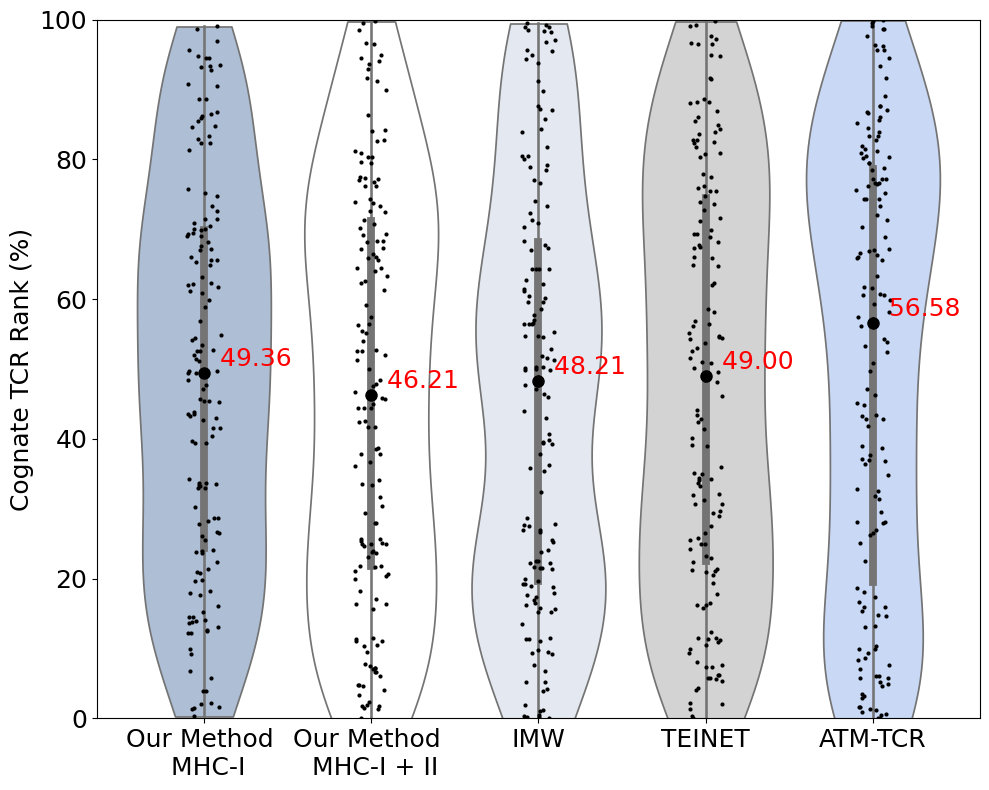

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_paths = [
    '/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/TCRranker/random/cognate_TCR_rank.csv',
    '/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/TCRranker2/random/cognate_TCR_rank.csv',
    '/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/IMW/IMW_random/cognate_TCR_rank.csv',
    '/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/TEINET/tei_random/cognate_TCR_rank.csv',
    '/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/ATM-TCR/atm_random/cognate_TCR_rank.csv'
]

colors = ["#a6bddc", "white", "#e2e8f3", "lightgray", "#c2d6fcca"]  # Color para el nuevo método
labels = ["Our Method \n MHC-I", "Our Method \n MHC-I + II", "IMW", "TEINET", "ATM-TCR", "New Method"]  # Nueva etiqueta

data = pd.DataFrame()
for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    
    if "TCRranker/random/cognate_TCR_rank.csv" in file_path or "TCRranker/output/TCRranker2/random/cognate_TCR_rank.csv" in file_path:
        df['percentage'] = df['percentage_lower']
    else:
        df['percentage'] = df['percentage_greater']
    
    df['Dataset'] = labels[i]
    data = pd.concat([data, df])

fig, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(data=data, x='Dataset', y='percentage', inner='box', hue='Dataset', palette=colors, cut=0, ax=ax, legend=False)
sns.stripplot(data=data, x='Dataset', y='percentage', color="black", size=3, jitter=True, ax=ax)

for i, label in enumerate(labels):
    median_value = data[data['Dataset'] == label]['percentage'].median()
    ax.plot(i, median_value, 'o', color='black', markersize=8, label=f'{label} Median')
    ax.text(i, median_value + 1, f'  {median_value:.2f}', color='red', ha='left', fontsize=18)

ax.set_ylabel("Cognate TCR Rank (%)", fontsize=18)
ax.set_xlabel("", fontsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=18) 
ax.set_ylim(0, 100)
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values


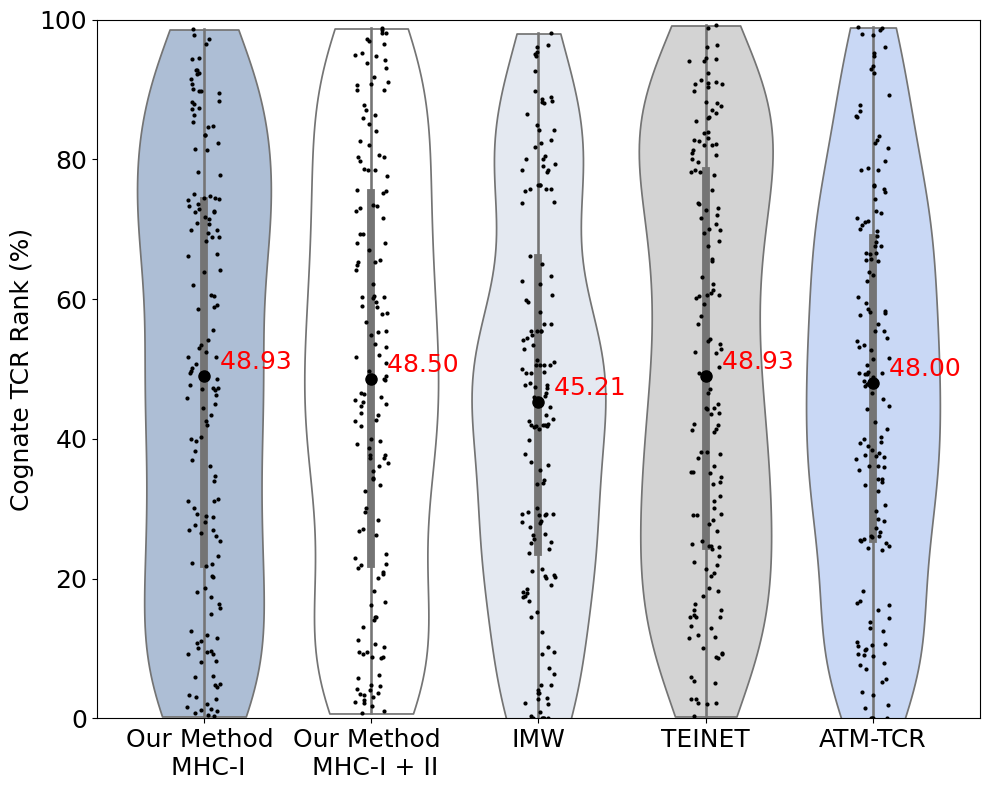

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_paths = [
    '/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/TCRranker/groups/cognate_TCR_rank.csv',
    '/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/TCRranker2/groups/cognate_TCR_rank.csv',
    '/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/IMW/IMW_groups/cognate_TCR_rank.csv',
    '/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/TEINET/tei_groups/combined_cognate_TCR_rank.csv',
    '/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/ATM-TCR/atm_groups/cognate_TCR_rank.csv' 
]

colors = ["#a6bddc", "white", "#e2e8f3", "lightgray", "#c2d6fcca"]  # Color para el nuevo método
labels = ["Our Method \n MHC-I", "Our Method \n MHC-I + II", "IMW", "TEINET", "ATM-TCR", "New Method"]  # Nueva etiqueta

data = pd.DataFrame()
for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    
    if "TCRranker/groups/cognate_TCR_rank.csv" in file_path or "TCRranker/output/TCRranker2/groups/cognate_TCR_rank.csv" in file_path:
        df['percentage'] = df['percentage_lower']
    else:
        df['percentage'] = df['percentage_greater']
    
    df['Dataset'] = labels[i]
    data = pd.concat([data, df])

fig, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(data=data, x='Dataset', y='percentage', inner='box', hue='Dataset', palette=colors, cut=0, ax=ax, legend=False)
sns.stripplot(data=data, x='Dataset', y='percentage', color="black", size=3, jitter=True, ax=ax)

for i, label in enumerate(labels):
    median_value = data[data['Dataset'] == label]['percentage'].median()
    ax.plot(i, median_value, 'o', color='black', markersize=8, label=f'{label} Median')
    ax.text(i, median_value + 1, f'  {median_value:.2f}', color='red', ha='left', fontsize=18)

ax.set_ylabel("Cognate TCR Rank (%)", fontsize=18)
ax.set_xlabel("", fontsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=18) 
ax.set_ylim(0, 100)
plt.tight_layout()
plt.show()

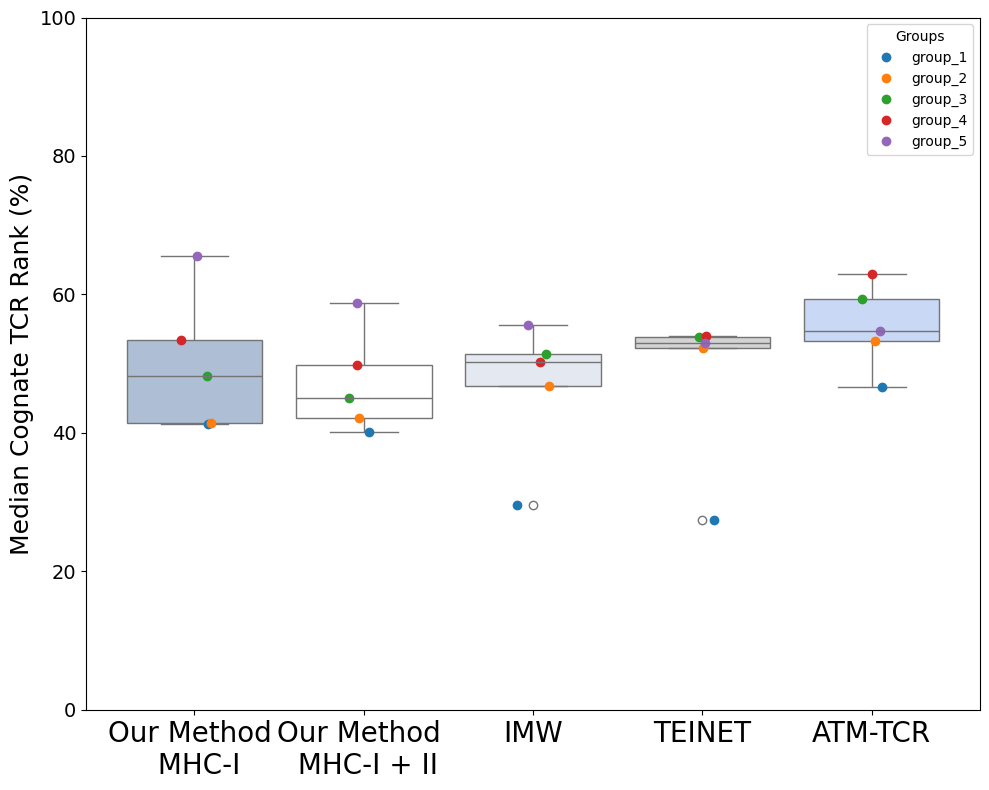

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os  # Importamos os para manejar rutas de archivos

# Definimos los grupos y métodos
groups = ['group_1', 'group_2', 'group_3', 'group_4', 'group_5']
methods = ["Our Method \n MHC-I", "Our Method \n MHC-I + II", 'IMW', 'TEINET', 'ATM-TCR']

# Colores específicos para cada grupo
group_colors = {
    'group_1': '#1f77b4',  # Azul
    'group_2': '#ff7f0e',  # Naranja
    'group_3': '#2ca02c',  # Verde
    'group_4': '#d62728',  # Rojo
    'group_5': '#9467bd',  # Morado
}

all_medians = []

# Iteración sobre cada método para calcular medianas
for method in methods:
    if method == 'Our Method \n MHC-I':
        method_name = 'TCRranker'
        abbreviation = ''
        percentage_column = 'percentage_lower'
    elif method == 'Our Method \n MHC-I + II':
        method_name = 'TCRranker2'
        abbreviation = ''
        percentage_column = 'percentage_lower'
    elif method == 'IMW':
        method_name = 'IMW'
        abbreviation = 'IMW_'
        percentage_column = 'percentage_greater'
    elif method == 'TEINET':
        method_name = 'TEINET'
        abbreviation = 'tei_'
        percentage_column = 'percentage_greater'
    else:
        abbreviation = 'atm_'
        method_name = 'ATM-TCR'
        percentage_column = 'percentage_greater'
        
    # Lectura de datos y cálculo de medianas por grupo
    for group in groups:
        # Asegúrate de que la ruta del archivo sea correcta
        file_path = f'/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/{method_name}/{abbreviation}random/{group}.csv'
        if os.path.exists(file_path):  # Verifica si el archivo existe
            df = pd.read_csv(file_path)
            median_value = df[percentage_column].median()
            all_medians.append({'Method': method, 'Group': group, 'Median': median_value})
        else:
            print(f"File not found: {file_path}")

# Conversión a DataFrame
median_df = pd.DataFrame(all_medians)

# Verifica si median_df no está vacío antes de proceder
if not median_df.empty:
    plt.figure(figsize=(10, 8))
    colors = ["#a6bddc", "white", "#e2e8f3", "lightgray", "#c2d6fcca"]
    sns.boxplot(data=median_df, x='Method', y='Median', palette=colors, hue='Method', dodge=False)

    # Dibuja los puntos con colores específicos para cada grupo
    for method in methods:
        for group in groups:
            # Asegúrate de que hay datos antes de acceder
            if not median_df[(median_df['Method'] == method) & (median_df['Group'] == group)].empty:
                median_value = median_df[(median_df['Method'] == method) & (median_df['Group'] == group)]['Median'].values[0]
                method_index = methods.index(method)  # Obtener el índice del método
                jitter = np.random.uniform(-0.1, 0.1)  # Ajustar el jitter para la visibilidad
                
                # Dibuja el punto con el color del grupo
                plt.plot(method_index + jitter, median_value, 'o', color=group_colors[group], markersize=6, alpha=1, 
                         label=group if method_index == 0 else "")  
        overall_median = median_df[median_df['Method'] == method]['Median'].median()
        #plt.text(method_index, overall_median + 1, f'{overall_median:.2f}', color='red', ha='left', fontsize=18)
    
    # Configuración de ejes
    plt.ylabel("Median Cognate TCR Rank (%)", fontsize=18)
    plt.xlabel("", fontsize=14)
    plt.tick_params(axis='y', labelsize=14)
    plt.tick_params(axis='x', labelsize=20)
    plt.ylim(0, 100)

    # Agregar leyenda
    plt.legend(title='Groups', loc='upper right')

    plt.tight_layout()
    plt.show()
else:
    print("No median values to display.")

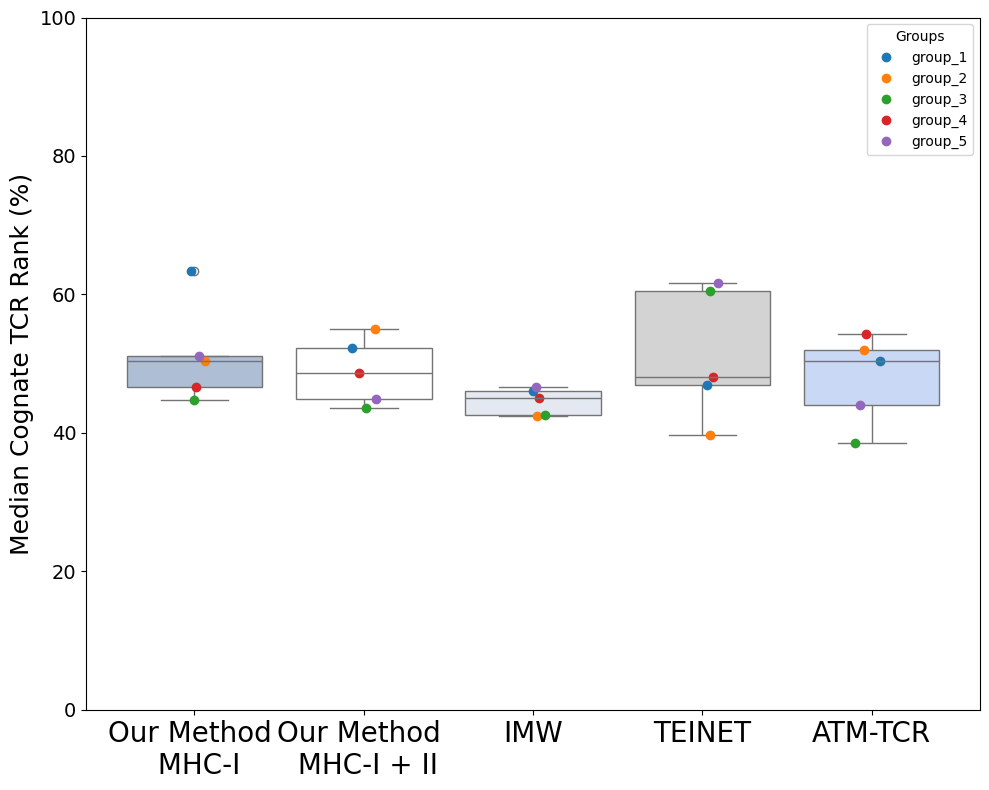

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os  # Importamos os para manejar rutas de archivos

# Definimos los grupos y métodos
groups = ['group_1', 'group_2', 'group_3', 'group_4', 'group_5']
methods = ["Our Method \n MHC-I", "Our Method \n MHC-I + II", 'IMW', 'TEINET', 'ATM-TCR']

# Colores específicos para cada grupo
group_colors = {
    'group_1': '#1f77b4',  # Azul
    'group_2': '#ff7f0e',  # Naranja
    'group_3': '#2ca02c',  # Verde
    'group_4': '#d62728',  # Rojo
    'group_5': '#9467bd',  # Morado
}

all_medians = []

# Iteración sobre cada método para calcular medianas
for method in methods:
    if method == 'Our Method \n MHC-I':
        method_name = 'TCRranker'
        abbreviation = ''
        percentage_column = 'percentage_lower'
    elif method == 'Our Method \n MHC-I + II':
        method_name = 'TCRranker2'
        abbreviation = ''
        percentage_column = 'percentage_lower'
    elif method == 'IMW':
        method_name = 'IMW'
        abbreviation = 'IMW_'
        percentage_column = 'percentage_greater'
    elif method == 'TEINET':
        method_name = 'TEINET'
        abbreviation = 'tei_'
        percentage_column = 'percentage_greater'
    else:
        abbreviation = 'atm_'
        method_name = 'ATM-TCR'
        percentage_column = 'percentage_greater'
        
    # Lectura de datos y cálculo de medianas por grupo
    for group in groups:
        file_path = f'/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/{method_name}/{abbreviation}groups/{group}/cognate_TCR_rank.csv'
        
        if os.path.exists(file_path):  # Verifica si el archivo existe
            df = pd.read_csv(file_path)
            median_value = df[percentage_column].median()
            all_medians.append({'Method': method, 'Group': group, 'Median': median_value})
        else:
            print(f"File not found: {file_path}")

# Conversión a DataFrame
median_df = pd.DataFrame(all_medians)

# Verifica si median_df no está vacío antes de proceder
if not median_df.empty:
    plt.figure(figsize=(10, 8))
    colors = ["#a6bddc", "white", "#e2e8f3", "lightgray", "#c2d6fcca"]
    sns.boxplot(data=median_df, x='Method', y='Median', palette=colors, hue='Method', dodge=False)

    # Dibuja los puntos con colores específicos para cada grupo
    for method in methods:
        for group in groups:
            # Asegúrate de que hay datos antes de acceder
            if not median_df[(median_df['Method'] == method) & (median_df['Group'] == group)].empty:
                median_value = median_df[(median_df['Method'] == method) & (median_df['Group'] == group)]['Median'].values[0]
                method_index = methods.index(method)  # Obtener el índice del método
                jitter = np.random.uniform(-0.1, 0.1)  # Ajustar el jitter para la visibilidad
                
            
                plt.plot(method_index + jitter, median_value, 'o', color=group_colors[group], markersize=6, alpha=1, 
                         label=group if method_index == 0 else "")  

        overall_median = median_df[median_df['Method'] == method]['Median'].median()
        #plt.text(method_index, overall_median + 1, f'{overall_median:.2f}', color='red', ha='left', fontsize=18)

    # Configuración de ejes
    plt.ylabel("Median Cognate TCR Rank (%)", fontsize=18)
    plt.xlabel("", fontsize=14)
    plt.tick_params(axis='y', labelsize=14)
    plt.tick_params(axis='x', labelsize=20)
    plt.ylim(0, 100)

    # Agregar leyenda
    plt.legend(title='Groups', loc='upper right')

    plt.tight_layout()
    plt.show()
else:
    print("No median values to display.")

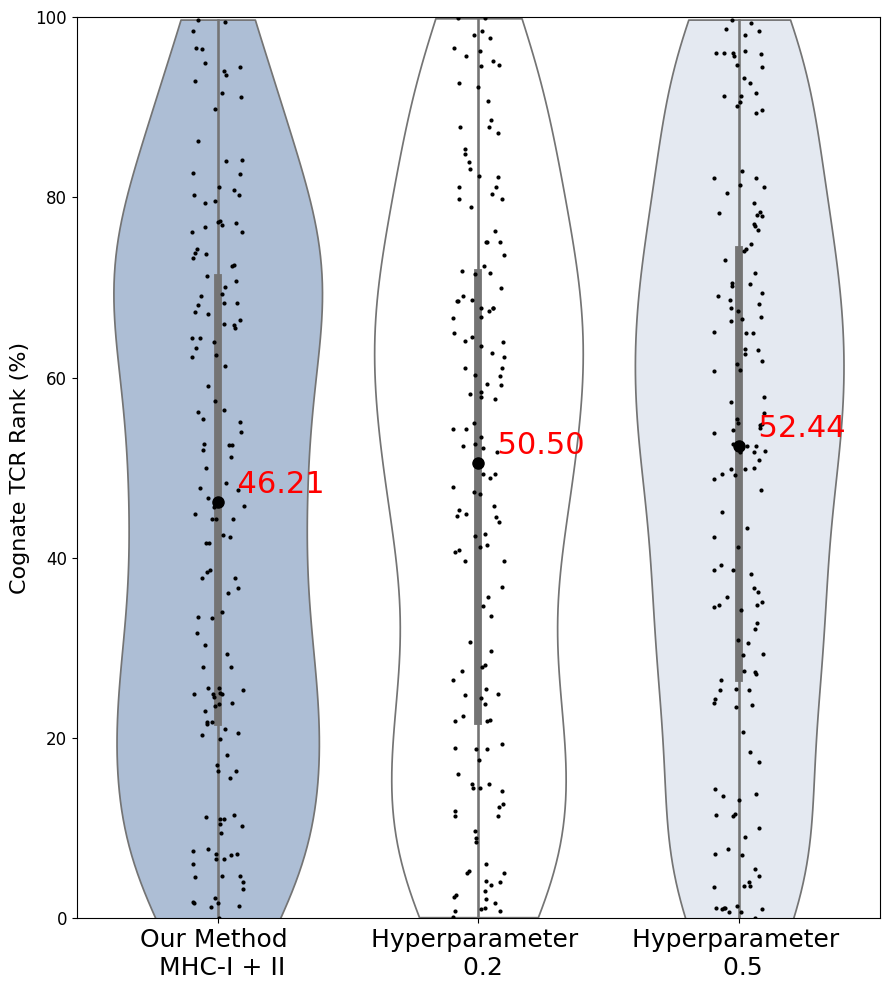

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de tres archivos en lugar de cinco
file_paths = [
    '/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/TCRranker2/random/cognate_TCR_rank.csv',
    '/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/TCRranker2/random/0.2_percentages.csv',
    '/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/output/TCRranker2/random/0.5_percentages.csv'
]

# Colores y etiquetas para los tres métodos
colors = ["#a6bddc", "white", "#e2e8f3"]
labels = ["Our Method \n MHC-I + II", "Hyperparameter \n 0.2", "Hyperparameter \n 0.5"]

# Crear un DataFrame vacío para almacenar los datos combinados
data = pd.DataFrame()

# Iterar sobre los archivos seleccionados y leer sus datos
for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    
    # Seleccionar la columna de porcentaje correcta según el archivo
    if 'percentage_lower' in df.columns:
        df['percentage'] = df['percentage_lower']
    elif 'percentage' not in df.columns:
        print(f"Error: 'percentage' column not found in {file_path}")
        continue
    
    # Asignar la etiqueta correspondiente y concatenar los datos
    df['Dataset'] = labels[i]
    data = pd.concat([data, df])

# Crear el gráfico de violín
fig, ax = plt.subplots(figsize=(9, 10))
sns.violinplot(data=data, x='Dataset', y='percentage', inner='box', hue='Dataset', palette=colors, cut=0, ax=ax, legend=False)
sns.stripplot(data=data, x='Dataset', y='percentage', color="black", size=3, jitter=True, ax=ax)

# Calcular y marcar las medianas en el gráfico
for i, label in enumerate(labels):
    median_value = data[data['Dataset'] == label]['percentage'].median()
    ax.plot(i, median_value, 'o', color='black', markersize=8)
    ax.text(i, median_value + 1, f'  {median_value:.2f}', color='red', ha='left', fontsize=22)

# Personalizar etiquetas y ejes
ax.set_ylabel("Cognate TCR Rank (%)", fontsize=16)
ax.set_xlabel("", fontsize=14)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=18) 
ax.set_ylim(0, 100)
plt.tight_layout()
plt.show()

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la lista de IDs PDB de interés
nr_pdb_130 = [
    '7n2p', '7l1d', '4jry', '5wkf', '2ckb', '7jwj', '5ivx', '2ypl', '5isz', '7n4k', '6bj3', '5c08', 
    '3e3q', '5wlg', '7n2o', '5jhd', '3rgv', '7pb2', '2ak4', '8wul', '1nam', '8shi', '1mi5', '5eu6', 
    '3tfk', '3d3v', '4jrx', '1kj2', '2esv', '3gsn', '7rrg', '3hg1', '6bj2', '5c09', '5men', '7n2n', 
    '3tpu', '6r2l', '7ndq', '6rp9', '7ow6', '7q9b', '6uon', '3tjh', '5nmf', '5m02', '5jzi', '6mtm', 
    '7nme', '7pbe', '5e9d', '1fo0', '8gvi', '6l9l', '8enh', '4qrp', '7n1e', '6zkw', '5w1w', '5nqk', 
    '7q99', '5sws', '3sjv', '7n6e', '4g8g', '2vlj', '6rpb', '5d2l', '3ffc', '8d5q', '3dxa', '8i5c', 
    '1bd2', '6vrm', '8i5d', '7r80', '8cx4', '6uln', '6vmx', '6rsy', '1g6r', '6tmo', '6vm8', '5d2n', 
    '3kpr', '7rtr', '8f5a', '6avf', '4eup', '7na5', '5xov', '6vqo', '6vm9', '7dzn', '5brz', '3o4l', 
    '6rpa', '7phr', '8qfy', '6avg', '3qdj', '4qrr', '6vrn', '3qdm', '8dnt', '6amu', '2jcc', '5e6i', 
    '3pwp', '7byd', '4mvb', '7jwi', '4mji', '3vxs', '7n2s', '3mv9', '2nx5', '6p64', '7qpj', '7rm4', 
    '5tez', '6tro', '5euo', '7n2r', '8gon', '3vxu', '6q3s', '4n5e', '3vxm', '7rk7'
]

# Leer el archivo CSV
file_path = '/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/structures_annotation/mhc_alleles_results.csv'
data = pd.read_csv(file_path)

# Filtrar los datos para incluir solo aquellos registros cuyo 'pdb_id' está en nr_pdb_130
filtered_data = data[data['pdb_id'].isin(nr_pdb_130)]

# Contar la frecuencia de cada alelo en la columna 'mhci_allele' después del filtrado
allele_counts = filtered_data['mhci_allele'].value_counts().reset_index()
allele_counts.columns = ['mhci_allele', 'count']

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=allele_counts, x='mhci_allele', y='count', color='skyblue')
plt.xticks(rotation=90, fontsize=18)
plt.ylabel("COUNT", fontsize=14)
plt.xlabel("", fontsize=14)
plt.ylabel
plt.tight_layout()

# Mostrar el gráfico
plt.show()

KeyError: 'MHC_allele'

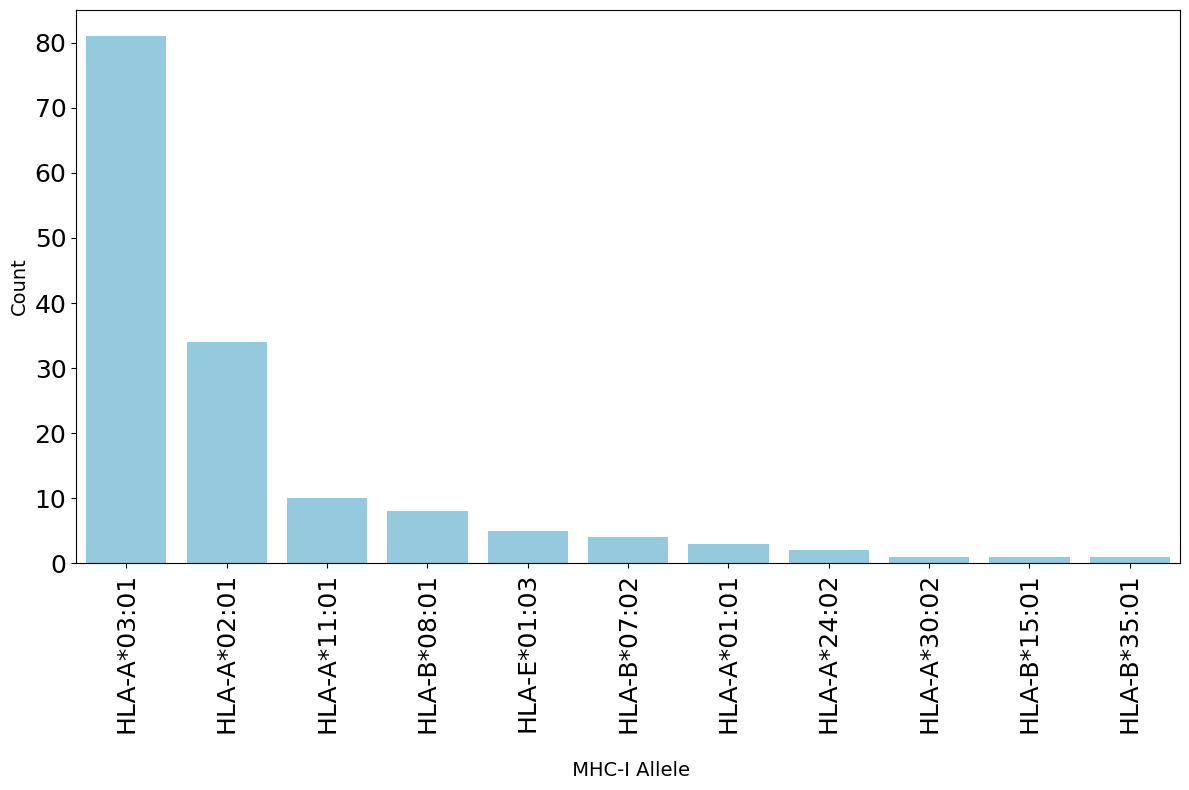

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = '/users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker/seqs_info/seqs_test_random.csv'
data = pd.read_csv(file_path)

# Contar la frecuencia de cada alelo en la columna 'mhci_allele'
allele_counts = data['MHC_allele'].value_counts().reset_index()
allele_counts.columns = ['MHC_allele', 'count']

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=allele_counts, x='MHC_allele', y='count', color='skyblue')
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("\n MHC-I Allele", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tight_layout()

# Mostrar el gráfico
plt.show()